# Lead Score - Case Study

__Problem Statement:__

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals and Objectives


There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

Lets divide the entire process into following steps:

- ___Step 1:___ Loading and Cleaning Data
> - a) Inspecting the Dataframe
> - b) Cleaning the Dataframe
- ___Step 2:___ Exploratory Data Analysis
> - a) Missing value Treatment
> - b) Dealing with unique valued columns
- ___Step 3:___ Data Visulaization
> - a) Univariate Analysis
> - b) Bivariate Analysis
- ___Step 4___: Outlier Handling
- ___Step 5___: Train test split
- ___Step 6___: Scaling
- ___Step 7:___ Model building
- ___Step 8:___ Plotting the ROC Curve
- ___Step 9:___ Finding Optimal Cutoff Point
- ___Step 10:___ Precision and Recall
- ___Step 11:___ Making predictions on the test set


## Step 1: Loading and Cleaning Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
# Importing dataset
leadscoring = pd.read_csv("Leads.csv")

## a) Inspecting the Dataframe

In [4]:
# Let's check the head of our dataset
leadscoring.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
leadscoring.shape

(9240, 37)

This dataset has
- 9240 rows
- 37 columns


In [6]:
# let's look at the statistical aspects of the dataframe
leadscoring.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
leadscoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## b) Cleaning the Dataframe

We do have few columns with 'Select' value which means the person didn't updated the details and left it as select, we are replacing this Select value with Nan

We have 'Select' values in these following columns

1. How did you hear about X Education
2. Lead Profile
3. Specialization
4. City

In [8]:
# Checking value counts in each column to understand the number of select values in each column

cols = ['How did you hear about X Education','City', 'Specialization', 'Lead Profile']

for i in cols:
    print(leadscoring[i].value_counts())
    print('_'*60)

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64
____________________________________________________________
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
____________________________________________________________
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration             

Replacing Select with Nan values
- Replacing  'Select' with Nan values since these values are also considered as missing data


In [9]:
# Replacing these 'Select' with Nan values 
leadscoring = leadscoring.replace('Select', np.nan)

In [10]:
# checking  for duplicates
sum(leadscoring.duplicated(subset = 'Prospect ID')) == 0

True

There are no duplicates in the data . We can drop 'Prospect ID' from the data

In [11]:
# Dropping Prospect ID column from the dataframe
leadscoring.drop('Prospect ID', axis = 1, inplace= True)

# Step 2: Exploratory Data Analysis

## a) Missing Value Treatment

In [12]:
# Checking null value percentage in each column which are greater than 0

missingdata = pd.DataFrame(round(leadscoring.isnull().sum()/len(leadscoring),2)*100, columns= ['Percentage of missing data'])

missingdata[missingdata['Percentage of missing data'] >0].sort_values('Percentage of missing data', ascending = False)

,Percentage of missing data
How did you hear about X Education,78.0
Lead Profile,74.0
Lead Quality,52.0
Asymmetrique Activity Index,46.0
Asymmetrique Profile Index,46.0
Asymmetrique Activity Score,46.0
Asymmetrique Profile Score,46.0
City,40.0
Specialization,37.0
Tags,36.0


Let's remove the columns with more than 45% null values

In [13]:
# Storing the variables having > 45% missing values in a list
miss_cols = list(missingdata[missingdata['Percentage of missing data'] > 45].index)
len(miss_cols)

7

In [14]:
# Removing these columns from the data frame
leadscoring.drop(miss_cols, axis = 1, inplace = True)

In [15]:
# Checking null value percentage of columns again

missingdata = pd.DataFrame(round(leadscoring.isnull().sum()/len(leadscoring),2)*100, columns= ['Percentage of missing data'])

missingdata[missingdata['Percentage of missing data'] >0].sort_values('Percentage of missing data', ascending = False)

,Percentage of missing data
City,40.0
Specialization,37.0
Tags,36.0
What is your current occupation,29.0
What matters most to you in choosing a course,29.0
Country,27.0
TotalVisits,1.0
Page Views Per Visit,1.0
Last Activity,1.0


Dealing with each column having null values

__Missing value treatment for 'City' Column:__

In [16]:
# Checking value counts to get an idea on missing values for city column
leadscoring['City'].value_counts(dropna= False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- As we can clearly see, most of the people are from Mumbai city, so filling these NaN values with 'Mumbai'

In [17]:
# Filling NaN with 'Mumbai' for city column

leadscoring['City'].fillna('Mumbai', axis = 0, inplace = True)

__Missing value treatment for 'Specialization' Column:__

In [18]:
# Checking value counts to get an idea on missing values for Specialization column

leadscoring['Specialization'].value_counts(dropna= False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Since we clearly don't know the Specialization intersted, we are filling the null values with 'Not_specified'

In [19]:
# Filling NaN with 'Not_specified' for Specialization column

leadscoring['Specialization'].fillna('Not_specified', axis = 0, inplace = True)

To reduce the frequency, We are grouping the all Management Specializations to Management_studies

In [20]:
# Combining all Management specilizations to Management_studies

management =['Finance Management', 'Human Resource Management','Marketing Management','Operations Management',
             'IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management',
             'Retail Management']

# Creating function to apply

def group(x):
    if 'Management' in x:
        return 'Management_studies'
    else:
        return x
    
# Applying this function to Specilization column

leadscoring['Specialization'] = leadscoring['Specialization'].apply(group)

__Missing value treatment for 'Tags' Column:__

In [21]:
# Checking value counts to understand the Tags unique values

leadscoring['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

- We are filling the null values with Not_specified tag since we don't know clearly whether a person is interested or not

In [22]:
# Filling NaN's with 'Not_specified' for Tags column

leadscoring['Tags'].fillna('Not_specified', axis = 0, inplace = True)

As we can see types of tags are of low value counts, lets merge these tags to single label of Other_tags

In [23]:
# replacing tags with low frequency with "Other_tags"
leadscoring['Tags'] = leadscoring['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS', 'Diploma holder (Not Eligible)',
                                                   
                                            'Approached upfront', 'Graduation in progress', 'number not provided', 'opp hangup','Still Thinking',

                                            'Lost to Others', 'Shall take in the next coming month', 'Lateral student', 'Interested in Next batch',

                                            'Recognition issue (DEC approval)', 'Want to take admission but has financial problems',

                                            'University not recognized', 'switched off', 'Already a student', 'Not doing further education',

                                            'invalid number', 'wrong number given', 'Interested  in full time MBA'],'Other_tags')

In [24]:
# Checking value_counts after replacing with other_tags
leadscoring['Tags'].value_counts()

Not_specified                          3353
Will revert after reading the email    2072
Other_tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

__Missing value treatment for 'What is your current occupation' Column:__

In [25]:
# Checking value counts for What is your current occupation column
leadscoring['What is your current occupation'].value_counts(dropna= False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

- As we can see most of the Current occupation is Unemployed, we are filling the null values with 'Unemployed'

In [26]:
# Filling NaN's with 'Unemployed' for What is your current occupation column
leadscoring['What is your current occupation'].fillna('Unemployed', axis = 0, inplace = True)

__Missing value treatment for 'What matters most to you in choosing a course' Column:__

In [27]:
# Checking values counts for What matters most to you in choosing a course column

leadscoring['What matters most to you in choosing a course'].value_counts(dropna= False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- Most of the response for this question is 'Better Career Prospects', So filling the null values with 'Better Career Prospects'

In [28]:
# Filling Nan's with Better Career Prospects for 'What matters most to you in choosing a course' column

leadscoring['What matters most to you in choosing a course'].fillna('Better Career Prospects', axis =0, inplace = True)

__Missing value treatment for 'Country' Column:__

In [29]:
# Checking valuecounts for country column

leadscoring['Country'].value_counts(dropna= False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Canada                     4
Kuwait                     4
South Africa               4
Germany                    4
Sweden                     3
Italy                      2
Ghana                      2
Bangladesh                 2
Philippines                2
Belgium                    2
Uganda                     2
Asia/Pacific Region        2
China                      2
Netherlands                2
Indonesia                  1
Switzerland                1
Tanzania                   1
Malaysia                   1
Vietnam                    1
Russia        

- We can see that most of the people are from india. So, replacing the null values with 'India' for country column

In [30]:
# Filling NaN's with 'India' for Country Column

leadscoring['Country'].fillna('India', axis =0, inplace = True)

__Missing value treatment for 'Last Activity' Column:__

In [31]:
# Checking value counts for Last Activity column

leadscoring['Last Activity'].value_counts(dropna= False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

- We don't have the information on Last Activity of the person, we are replacing this with others

In [32]:
# replacing Nan Values and combining low frequency values

leadscoring['Last Activity'] = leadscoring['Last Activity'].replace(np.nan,'Others')

leadscoring['Last Activity'] = leadscoring['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [33]:
# Checking Missing value percentage again

round(leadscoring.isnull().sum()/len(leadscoring),2).sort_values(ascending = False)

TotalVisits                                      0.01
Page Views Per Visit                             0.01
Last Notable Activity                            0.00
What matters most to you in choosing a course    0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
Search                                           0.00
A free copy of Mastering The Interview           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

- Dropping rows for these missing values since the percentage of missing data is very low i.e,. 0.01 %

In [34]:
# dropping row wise nan values 
leadscoring.dropna(inplace=True)

In [35]:
# Checking shape of the dataframe once we dropped the rows consists of nan
leadscoring.shape

(9074, 29)

In [36]:
# Checking null values count again
leadscoring.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

- Finally, we don't have any null values in the dataframe with 9074 rows and 29 columns

## b) Dealing with Unique valued columns

In [37]:
# Checking Lead Source column value counts
leadscoring['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
NC_EDM                  1
WeLearn                 1
testone                 1
blog                    1
welearnblog_Home        1
Pay per Click Ads       1
youtubechannel          1
Name: Lead Source, dtype: int64

- Lead Source columns has more low frequency values, so we are combining low frequecy values and merging few unique values to category of others.


In [38]:
# combining low frequency values for Lead Source column
leadscoring['Lead Source'] = leadscoring['Lead Source'].replace('google','Google')
leadscoring['Lead Source'] = leadscoring['Lead Source'].replace('Facebook','Social Media')
leadscoring['Lead Source'] = leadscoring['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')     

In [39]:
# Checking Last Notable Activity column value counts

leadscoring['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [40]:
# combining low frequency values for Last Notable Activity column

leadscoring['Last Notable Activity'] = leadscoring['Last Notable Activity'].replace(['Email Received','Resubscribed to emails',
                                             'View in browser link Clicked','Form Submitted on Website',
                                             'Approached upfront','Email Marked Spam','Had a Phone Conversation',
                                             'Unreachable','Unsubscribed','Email Bounced'], 'Other_activity')

In [41]:
# Creating list to check the value counts of each column
my_list = ['Lead Origin','Do Not Email','Do Not Call','Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
        'What matters most to you in choosing a course','Country']

In [42]:
# Checking value counts for all the categorical columns to eliminate the skewed data

for col in my_list:
    print(pd.DataFrame(leadscoring[col].value_counts()))
    print('--'*60)

                         Lead Origin
Landing Page Submission         4885
API                             3578
Lead Add Form                    581
Lead Import                       30
------------------------------------------------------------------------------------------------------------------------
     Do Not Email
No           8358
Yes           716
------------------------------------------------------------------------------------------------------------------------
     Do Not Call
No          9072
Yes            2
------------------------------------------------------------------------------------------------------------------------
                           Last Activity
Email Opened                        3432
SMS Sent                            2716
Olark Chat Conversation              972
Page Visited on Website              640
Converted to Lead                    428
Email Bounced                        312
Email Link Clicked                   267
Others             

From the above analysis:

- Do Not call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque columns have __99%__ as __'No'__ in the data. We can drop these unique categorical columns.
-  'What matters most to you in choosing a course' and 'Country' skewed towards only one category. Dropping these columns from the data frame

In [43]:
# Creating list to drop these columns from the data frame 
drop_cols = ['Do Not Call', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
        'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
        'What matters most to you in choosing a course', 'Country']

In [44]:
# dropping these columns from the Dataframe
leadscoring.drop(drop_cols, axis = 1, inplace=True)

In [45]:
leadscoring.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not_specified,Unemployed,Interested in other courses,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not_specified,Unemployed,Ringing,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not_specified,Unemployed,Will revert after reading the email,No,Modified


In [46]:
# Checking columns of Data
leadscoring.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [47]:
# Numerical columns of given data
numerical_cols = leadscoring.describe().columns
numerical_cols

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [48]:
# Length of numerical columns
len(numerical_cols)

5

In [49]:
# Categorical columns in given data
categorical_cols = leadscoring.select_dtypes(include='object').columns
categorical_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
# Length of Categorical columns
len(categorical_cols)

9

# Step 3:  Data Visualisation

### a) Univariate Analysis

In [1]:
for i in enumerate(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity']):
    print(i)

(0, 'Lead Origin')
(1, 'Lead Source')
(2, 'Do Not Email')
(3, 'Last Activity')


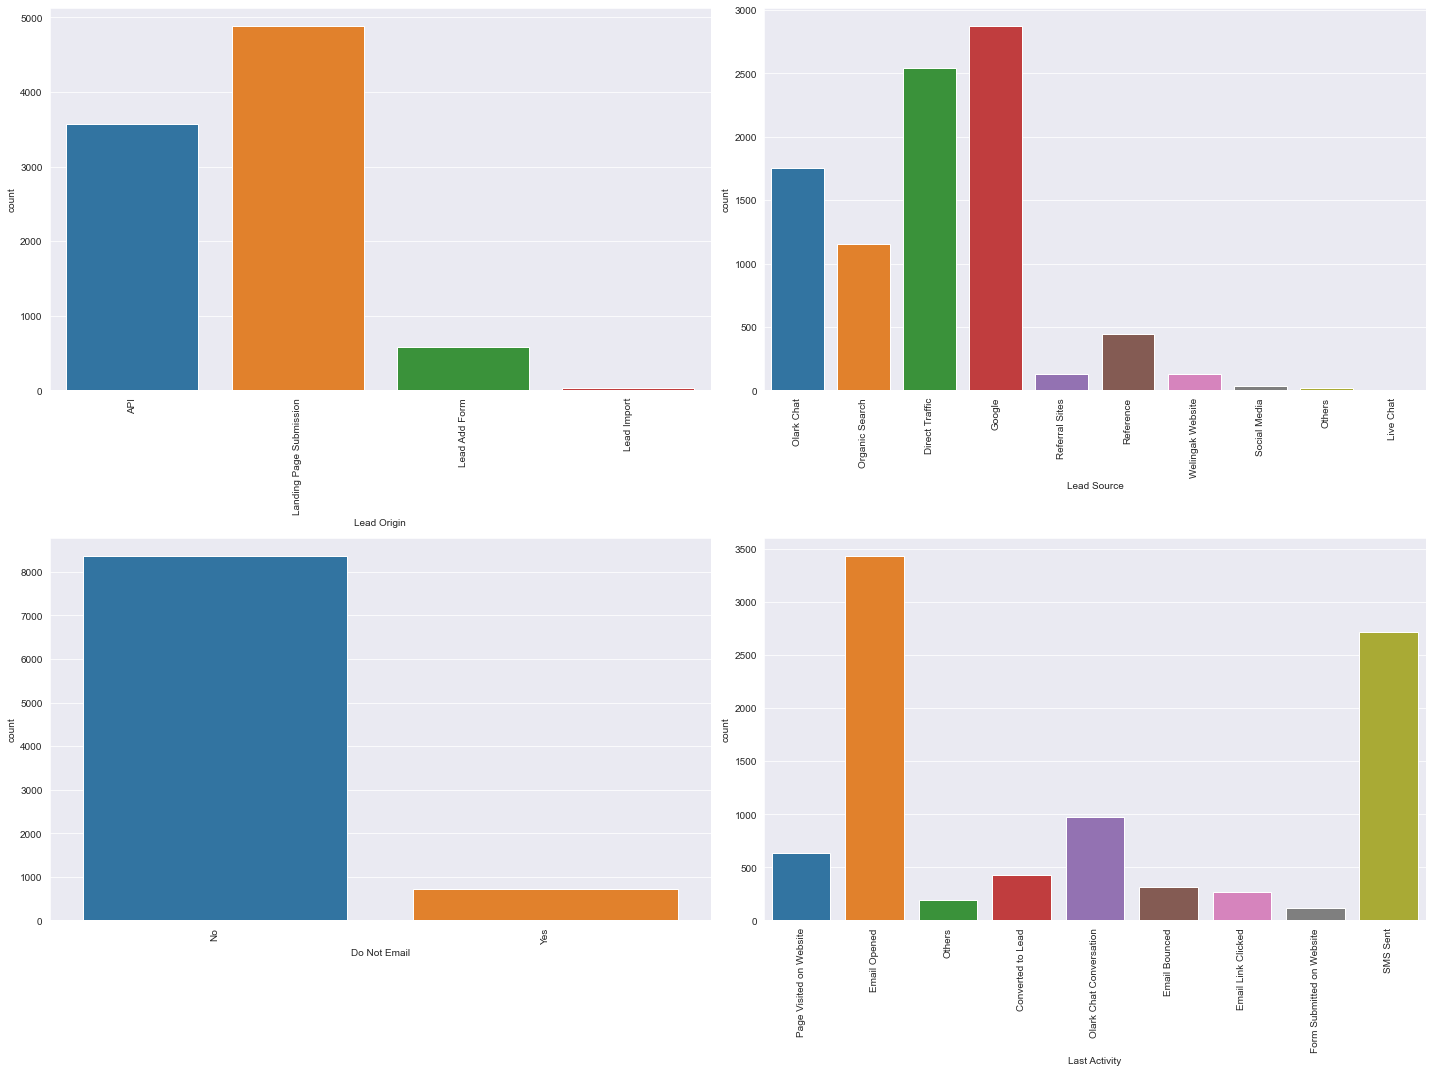

In [51]:
# Count plot for Lead Origin, Lead Source, Do Not Email and Last Activity
plt.figure(figsize=[20,15])
for cols in enumerate(categorical_cols[0:4]):
    plt.subplot(2,2, cols[0]+1)
    sns.countplot(leadscoring[cols[1]])
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

___Inferences:___

- We can see that Landing Page submission, API seems to be more important Lead origin
- Most important lead sources are Google, Direct Traffic, Olark chat and Organic Search
- Most people are looking to get the email from X-Education
- Most people last activity seems to be Email opened and SMS sent

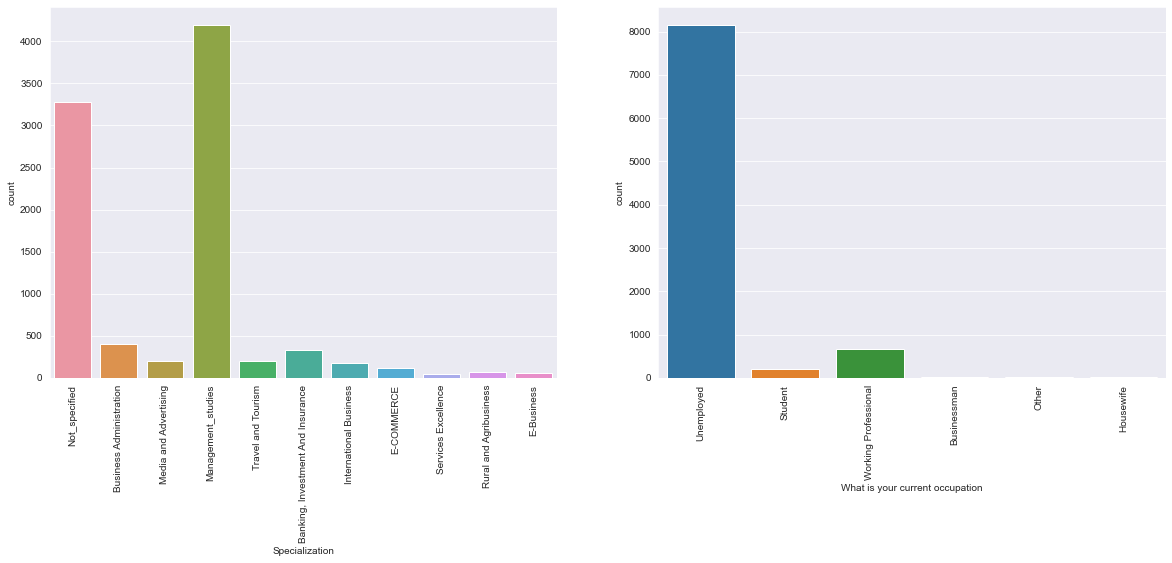

In [52]:
# Count plot for Specialization and What is your current Occupation
plt.figure(figsize=[20,15])
for cols in enumerate(categorical_cols[4:6]):
    plt.subplot(2,2, cols[0]+1)
    sns.countplot(leadscoring[cols[1]])
    plt.xticks(rotation = 90)
plt.show()

___Inferences:___

- Management Studies seems to be most selected Specialization
- Most people interacting with our website are Unemployed

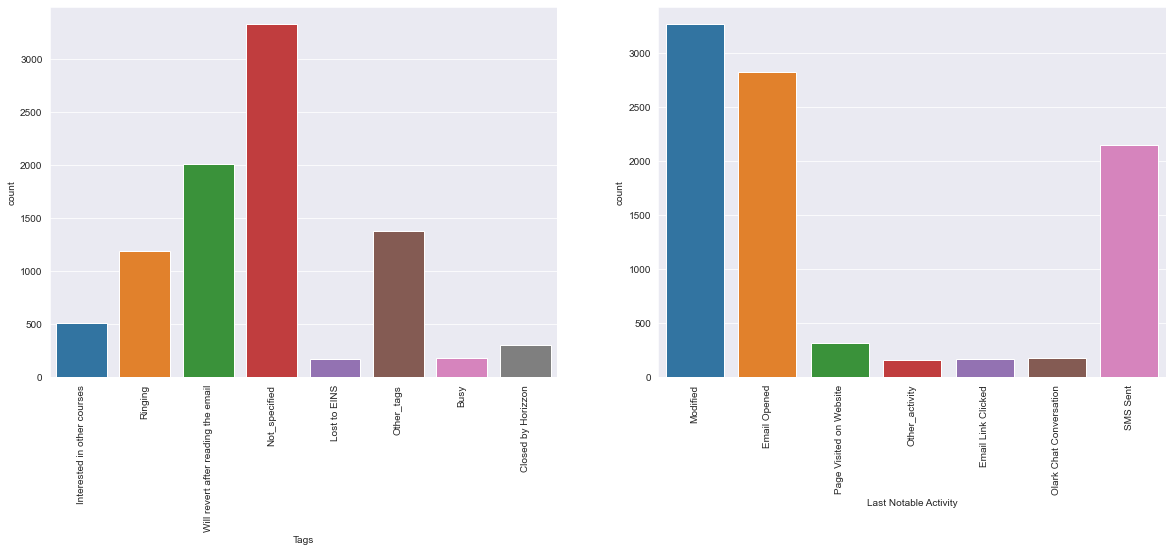

In [53]:
# Count plot for Tags and Last Notable Activity
plt.figure(figsize=[20,15])
for cols in enumerate(categorical_cols[6::2]):
    plt.subplot(2,2, cols[0]+1)
    sns.countplot(leadscoring[cols[1]])
    plt.xticks(rotation = 90)
plt.show()

___Inferences:___

- Most peoples Tags responses are not specified, however, we can see most of the people will revert after reading the email
- Top 3 Last notable activities are Modified, Email opened  and SMS sent

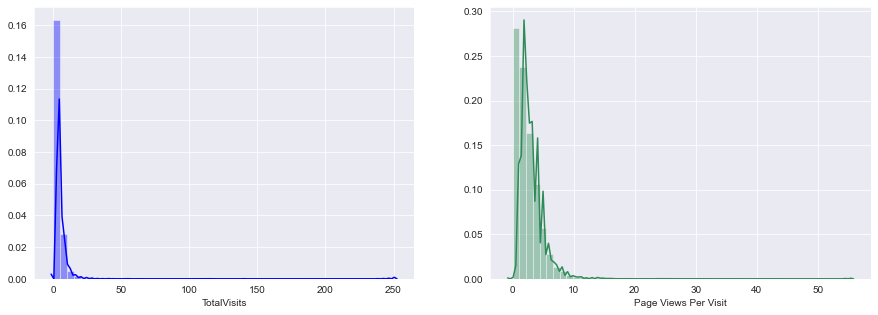

In [54]:
# Distribution plot for TotalVisits and Page Views Per Visit
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.distplot(leadscoring.TotalVisits, color = 'blue')
plt.subplot(1,2,2)
sns.distplot(leadscoring['Page Views Per Visit'], color= 'seagreen')
plt.show()

___Inferences:___

- We can see that TotalVisits are mostly below 30 and skewed towards right
- Page views per visit is mostly less than 10 and skewed towards right

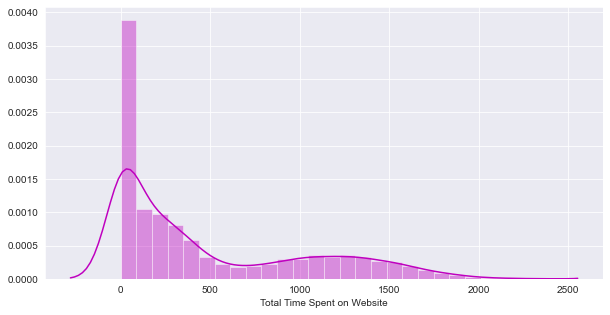

In [55]:
# Distribution plot for Total Time Spent on Website
plt.figure(figsize=[10,5])
sns.distplot(leadscoring['Total Time Spent on Website'], color='m')
plt.show()

___Inferences:___

- Total Time spent on website by most of the persons are below 500 and distribution is skewed towards right
- We can also see slight increase between 1000 and 1500

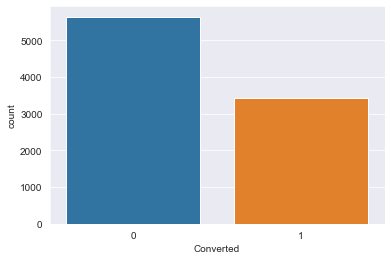

In [56]:
# Count plot for converted
sns.countplot(leadscoring['Converted'])
plt.show()

__Inferences:__

- We can see that out of 9074 people approximately 3200 people likely join course on X-Education

### b) Bivariate Analysis

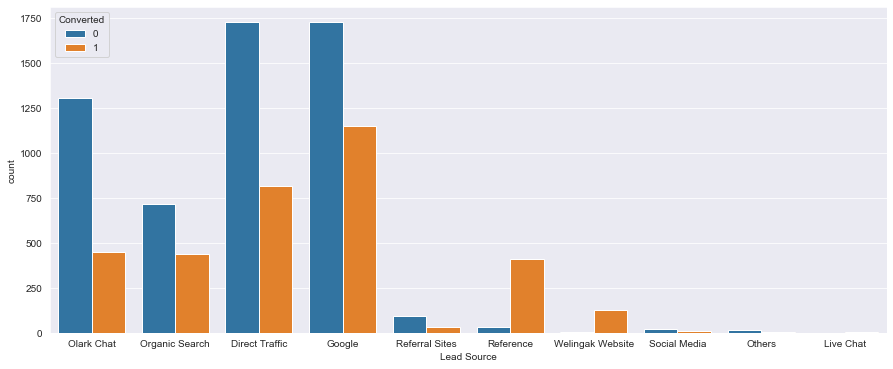

In [57]:
# Count plot for Lead Source vs converted
plt.figure(figsize=[15,6])
sns.countplot(leadscoring['Lead Source'],hue= leadscoring.Converted)
plt.show()

___Inferences:___
- From the above plot we can see that conversion rate for reference and Welingak website is high
- High conversion is happening through Google, Direct Traffic, Organic Search and Olark Chat

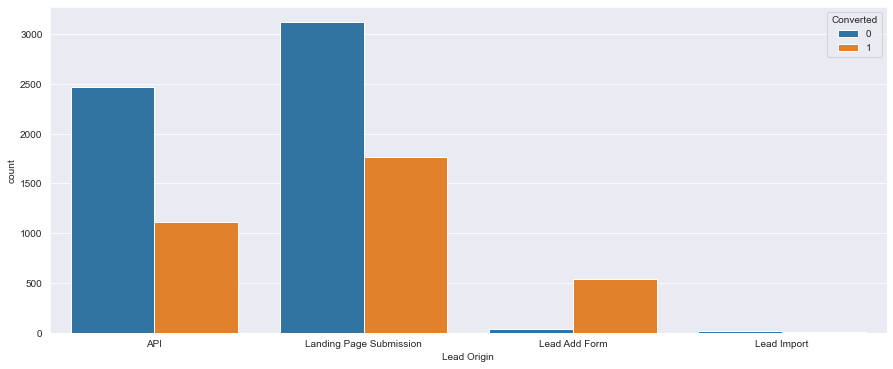

In [58]:
# Count plot for Lead Origin vs converted 

plt.figure(figsize=[15,6])
sns.countplot(leadscoring['Lead Origin'],hue= leadscoring.Converted)
plt.show()


___Inferences:___

- We can see that conversion count for Landing Page Submission and ApI are high
- Conversion rate for Lead Add form is high

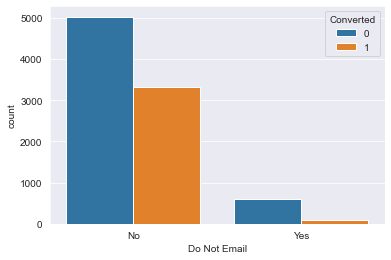

In [59]:
# Count plot for Do Not Email vs converted 

sns.countplot(leadscoring['Do Not Email'],hue= leadscoring.Converted)
plt.show()

___Inferences:___

- We can see that if the Do Not email is No, the converted count is high, it means for the people we are sending emails has high chance of getting converted.

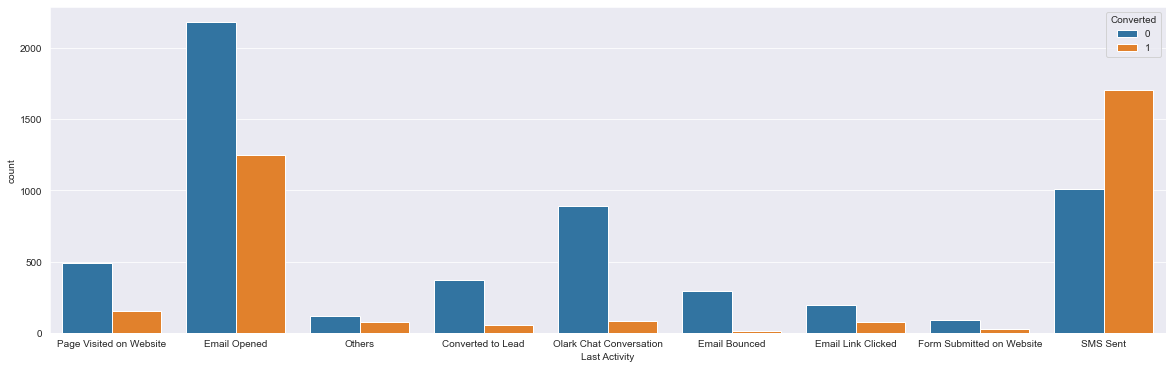

In [60]:
# Count plot for Last Activity vs converted 
plt.figure(figsize=[20,6])
sns.countplot(leadscoring['Last Activity'], hue= leadscoring.Converted)
plt.show()

___Inferences:___

- We can see that most people are getting converted by SMS sent and opening email as Last Activity
- Olark Chat Conversation Last Activity conversion rate is very low

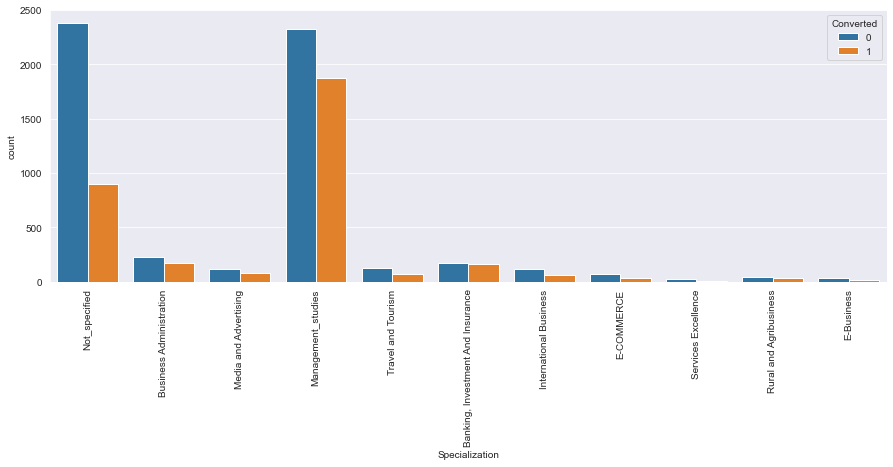

In [61]:
# Count plot for Specialization vs converted 
plt.figure(figsize=[15,5])
sns.countplot(leadscoring['Specialization'], hue= leadscoring.Converted)
plt.xticks(rotation = 90)
plt.show()

___Inferences:___

- We can see that for Management Studies, the converted count is high.
- Banking, Investment and Insurance conversion rate is high in specializations

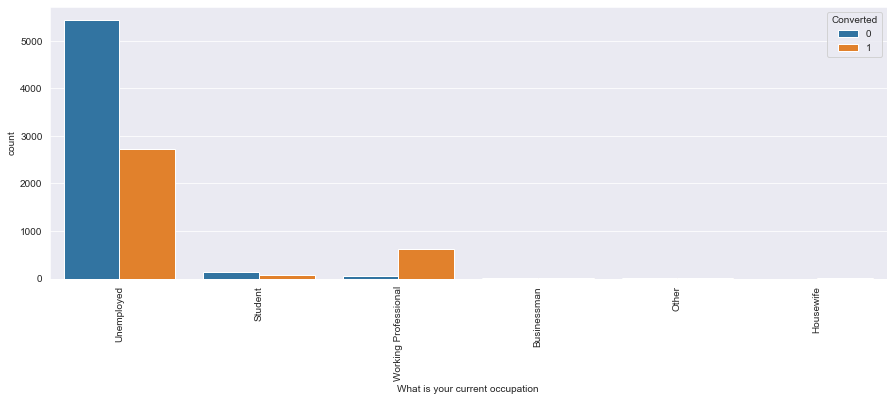

In [62]:
# Count plot for What is your current occupation vs converted 
plt.figure(figsize=[15,5])
sns.countplot(leadscoring['What is your current occupation'], hue= leadscoring.Converted)
plt.xticks(rotation = 90)
plt.show()


___Inferences:___

- We can see that Mostly Unemployed people are opting for Education courses
- For Working professionals the conversion rate is high.

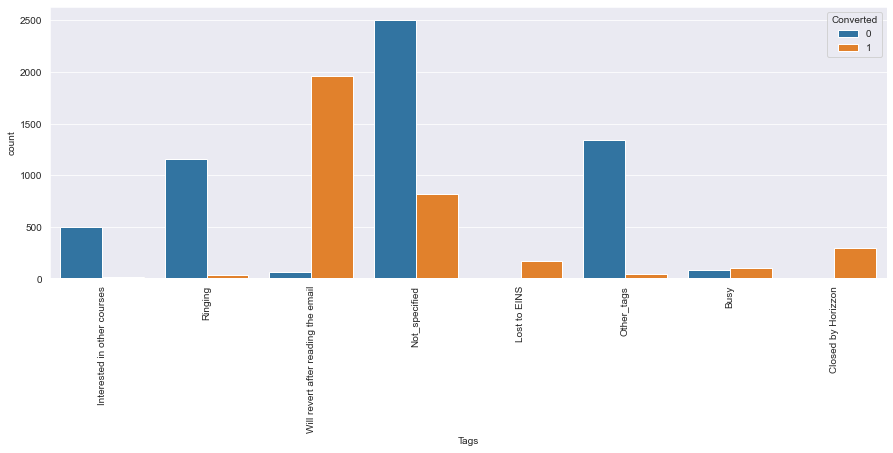

In [63]:
# Count plot for Tags vs converted 
plt.figure(figsize=[15,5])
sns.countplot(leadscoring['Tags'], hue= leadscoring.Converted)
plt.xticks(rotation = 90)
plt.show()

___Inferences:___

- We can see higher conversion rate for Will refert after reading the email response tag and closed by Horizzon
- Low converstion rate for Ringing, interested in other courses and other tags

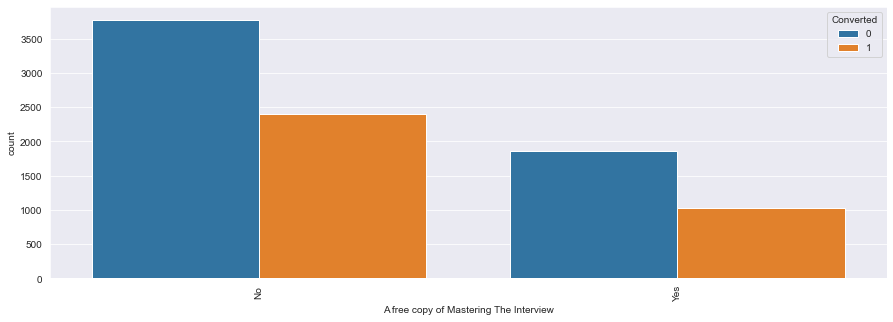

In [64]:
# Count plot for 'A free copy of Mastering The Interview' vs converted 
plt.figure(figsize=[15,5])
sns.countplot(leadscoring['A free copy of Mastering The Interview'], hue= leadscoring.Converted)
plt.xticks(rotation = 90)
plt.show()

___Inferences:___

- A free copy of mastering the interview count of converted is high for the 'No' response

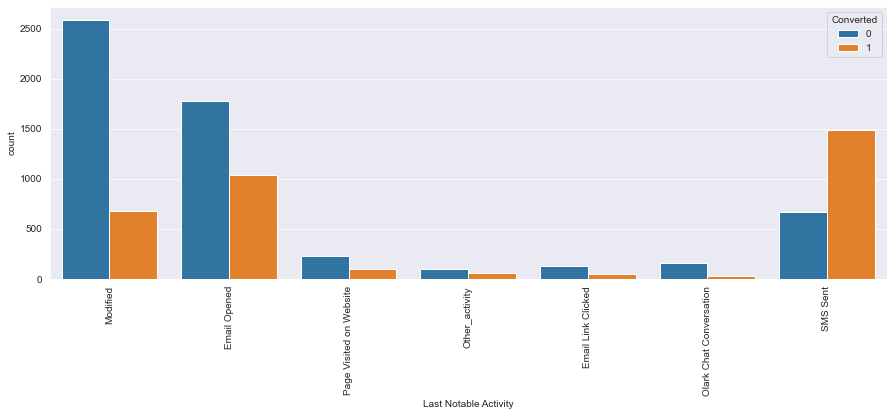

In [65]:
# Count plot for Last Notable Activity with converted 
plt.figure(figsize=[15,5])
sns.countplot(leadscoring['Last Notable Activity'], hue= leadscoring.Converted)
plt.xticks(rotation = 90)
plt.show()

___Inferences:___

- SMS sent last notable activity conversion seems to be high, we can target the persons who have sent sms as last activity to increase the conversion
- Email opened and modified conversion count of converted is also good compared to other categories

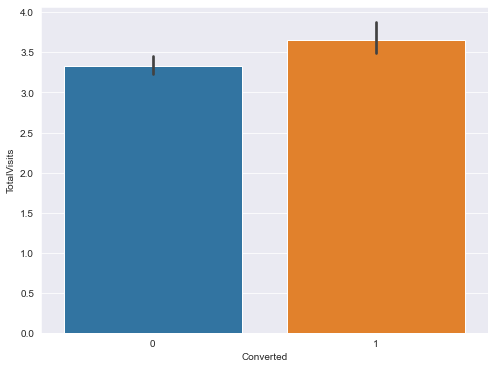

In [66]:
# Barplot for Converted vs TotalVisits
plt.figure(figsize=[8,6])
sns.barplot(x= leadscoring.Converted, y = leadscoring.TotalVisits)
plt.show()

___Inferences:___

- If the total visits are more, the person is more likely to join course in X-Education

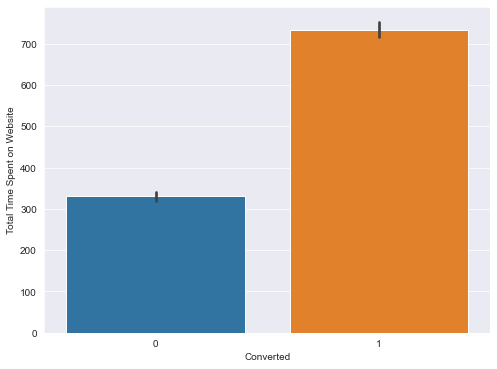

In [67]:
# Barplot for Converted vs Total Time Spent on Website

plt.figure(figsize=[8,6])
sns.barplot(x= leadscoring.Converted, y = leadscoring['Total Time Spent on Website'])
plt.show()

___Inferences:___

- We can see that if the time spent on website is more, the person is more likely to join the course
- We need to make the website more attractive and clear to increase the time spent on website

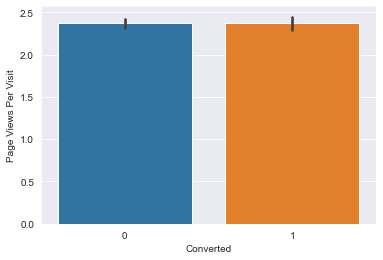

In [68]:
sns.barplot(x= leadscoring.Converted, y = leadscoring['Page Views Per Visit'])
plt.show()

___Inferences:___

- From the above plot both Converted and not converted count is equal, we cannot infer anything from the above plot

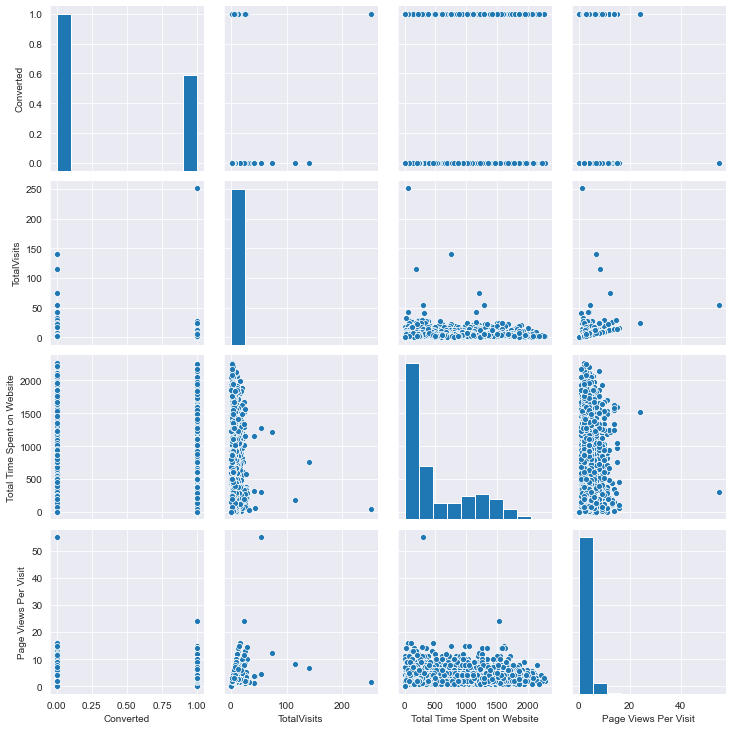

In [69]:
# Pair plot for numerical columns in our data
sns.pairplot(leadscoring[numerical_cols[1:]])
plt.show()

In [70]:
# Correlation for numerical data
correlation = leadscoring.iloc[:,1:].corr()
correlation

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000


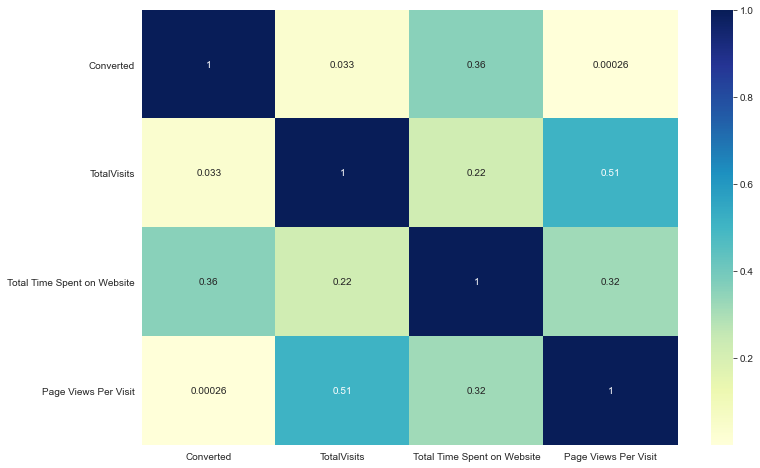

In [71]:
# Heatmap for correlation matrix
plt.figure(figsize=[12,8])
sns.heatmap(correlation, annot=True, cmap= 'YlGnBu')
plt.show()

___Inferences:___

- We can see that there is a strong correlation between Total time spent on website and conveted column
- There is a correlation of 0.51 between TotalVisits and Page Views per Visit columns

In [72]:
leadscoring.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not_specified,Unemployed,Interested in other courses,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not_specified,Unemployed,Ringing,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not_specified,Unemployed,Will revert after reading the email,No,Modified


# Step 4: Outlier Handling

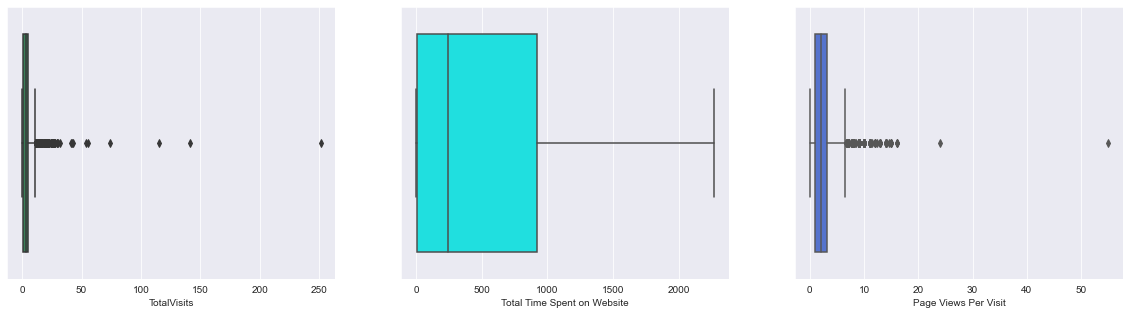

In [73]:
# Box plots for numerical columns before outlier Handling
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sns.boxplot(leadscoring['TotalVisits'], color='seagreen')
plt.subplot(1,3,2)
sns.boxplot(leadscoring['Total Time Spent on Website'], color='cyan')
plt.subplot(1,3,3)
sns.boxplot(leadscoring['Page Views Per Visit'], color='royalblue')
plt.show()

Lets do Hard capping for TotalVisits and Page Views per Visit columns. We are taking lower and upper quantiles as 0.05 and 0.95 and removing rest of the data

In [74]:
# Outlier capping for TotalVisits and Page Views columns

for col in ['TotalVisits', 'Page Views Per Visit']:    
    Q1 = leadscoring[col].quantile(0.05)
    Q3 = leadscoring[col].quantile(0.95)
    IQR = Q3-Q1
    leadscoring = leadscoring[(leadscoring[col] >= (Q1-1.5*IQR))&(leadscoring[col] <= (Q3 + 1.5*IQR))]

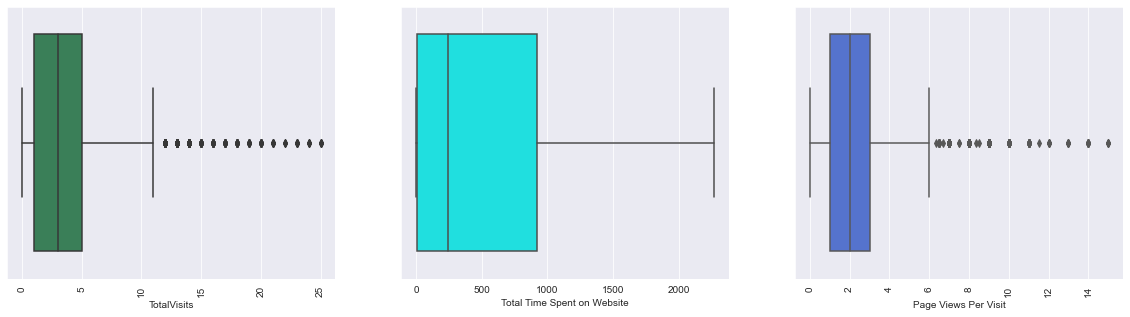

In [75]:
# Box plots for numerical columns after outlier Handling

plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sns.boxplot(leadscoring['TotalVisits'], color='seagreen')
plt.xticks(rotation = 90)
plt.subplot(1,3,2)
sns.boxplot(leadscoring['Total Time Spent on Website'], color='cyan')
plt.subplot(1,3,3)
sns.boxplot(leadscoring['Page Views Per Visit'], color='royalblue')
plt.xticks(rotation = 90)
plt.show()

We are using Lead Number as index which will be helpul in identifying whether a lead is hot or not

In [76]:
# Adding Lead number to dropcols list
updated_lead = leadscoring.set_index('Lead Number')

In [77]:
# Conversion rate for given data
conversion_ratio = sum(updated_lead.Converted)/len(updated_lead.Converted)*100
conversion_ratio

37.8868258178603

Conversion ratio for the given data is approximately 37.8 percent. It means out of 100 persons 38 persons are likely to join X-Education courses

In [78]:
# Creating dummies for the categorical data
Final_lead = pd.get_dummies(updated_lead)
Final_lead

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Tags_Will revert after reading the email,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.00,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
660728,0,5.0,674,2.50,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
660727,1,2.0,1532,2.00,0,1,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
660719,0,1.0,305,1.00,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
660681,1,2.0,1428,1.00,0,1,0,0,0,1,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579564,1,8.0,1845,2.67,0,1,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
579546,0,2.0,238,2.00,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
579545,0,2.0,199,2.00,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


# Step 5: Train_test_split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# Taking Converted as Targer variable y and remaining as independent variables X
X = Final_lead.drop('Converted', axis = 1)
y = Final_lead['Converted']

In [81]:
# Splitting the data to train and test with 20 % data as test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

In [82]:

print("X train Shape : ", X_train.shape)
print("y train Shape : ", y_train.shape)
print("X test Shape : ", X_test.shape)
print("y test Shape : ", y_test.shape)

X train Shape :  (7238, 62)
y train Shape :  (7238,)
X test Shape :  (1810, 62)
y test Shape :  (1810,)


# Step 6 : Scaling

We need to scale only few columns from the data. They are 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'

In [83]:
from sklearn.preprocessing import MinMaxScaler

Scaling these columns using Minmaxscaler

In [84]:
# Scaling data
scaling_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

scaler = MinMaxScaler()

X_train[scaling_cols] = scaler.fit_transform(X_train[scaling_cols])


In [85]:
# Transforming data for test data

X_test[scaling_cols] = scaler.transform(X_test[scaling_cols])

In [86]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,...,Tags_Will revert after reading the email,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
635958,0.24,0.082557,0.400000,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
627085,0.00,0.000000,0.000000,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
599386,0.16,0.166889,0.266667,0,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
608266,0.08,0.459831,0.133333,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
581356,0.08,0.040391,0.133333,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [87]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,...,Tags_Will revert after reading the email,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
616820,0.00,0.000000,0.000000,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
609561,0.08,0.071460,0.133333,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
615707,0.08,0.190857,0.133333,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
614849,0.00,0.000000,0.000000,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
608760,0.00,0.000000,0.000000,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


# Step 7: Model Building  and Evaluation

In [88]:
# importing required libraries
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

### Running First Train model

In [89]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7238
Model:                            GLM   Df Residuals:                     7184
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 08 Mar 2021   Deviance:                          nan
Time:                        11:40:40   Pearson chi2:                 3.10e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  4.08e+14    4.3e+06   9.49e+07      0.000    4.08e+14    4.08e+14
TotalVisits                                           6.116e+14   9.15e+06   6.68e+07      0.000    6.12e+14    6.12e+14
Total Time Spent on Website                           1.182e+15   4.01e+06   2.95e+08      0.000    1.18e+15    1.18e+15
Page Views Per Visit                                 -1.936e+14    9.5e+06  -2.04e+07      0.000   -1.94e+14   -1.94e+14
Lead Origin_API                                      -1.607e+13   1.24e+07   -1.3e+06      0.000   -1.61e+13   -1.61e+13
Lead Origin_Landing Page Submission                  -6.497e+13   1.24e+07  -5.25e+06      0.000    -6.5e+13    -6.5e+13
Lead Origin_Lead Add Form                            -3.253e+14   2.37e+07  -1.37e+07      0.000   -3.25e+14   -3.25e+14
Lead Origin_Lead Import                               8.143e+14   3.24e+07   2.51e+07      0.000    8.14e+14    8.14e+14
Lead Source_Direct Traffic                           -9.423e+14   1.23e+07  -7.66e+07      0.000   -9.42e+14   -9.42e+14
Lead Source_Google                                   -9.185e+14   1.22e+07   -7.5e+07      0.000   -9.19e+14   -9.19e+14
Lead Source_Live Chat                                 6.535e+15    6.4e+07   1.02e+08      0.000    6.54e+15    6.54e+15
Lead Source_Olark Chat                               -5.242e+14   1.23e+07  -4.26e+07      0.000   -5.24e+14   -5.24e+14
Lead Source_Organic Search                           -9.717e+14   1.24e+07  -7.84e+07      0.000   -9.72e+14   -9.72e+14
Lead Source_Others                                   -7.788e+14   1.79e+07  -4.36e+07      0.000   -7.79e+14   -7.79e+14
Lead Source_Reference                                 -6.59e+14   2.16e+07  -3.06e+07      0.000   -6.59e+14   -6.59e+14
Lead Source_Referral Sites                           -9.804e+14   1.37e+07  -7.13e+07      0.000    -9.8e+14    -9.8e+14
Lead Source_Social Media                             -1.439e+15   3.67e+07  -3.93e+07      0.000   -1.44e+15   -1.44e+15
Lead Source_Welingak Website                          1.087e+15   2.21e+07   4.92e+07      0.000    1.09e+15    1.09e+15
Do Not Email_No                                       4.031e+14    2.8e+06   1.44e+08      0.000    4.03e+14    4.03e+14
Do Not Email_Yes                                      4.881e+12   3.06e+06   1.59e+06      0.000    4.88e+12    4.88e+12
Last Activity_Converted to Lead                       5.061e+13   3.93e+06   1.29e+07      0.000    5.06e+13    5.06e+13
Last Activity_Email Bounced                           1.192e+14   5.21e+06   2.29e+07      0.000    1.19e+14    1.19e+14
Last Activity_Email Link Clicked                      1.69

## Feature selection using RFE (Recursive Feature Elimination)

In [90]:
# Using RFE to find the top 15 variables from the data

LR = LogisticRegression()

rfe = RFE(LR,15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_API', False, 12),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 27),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 48),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Others', False, 33),
 ('Lead Source_Reference', False, 16),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Social Media', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_No', False, 15),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 2),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', False, 37),
 ('Last Activity_Email Opened', False, 23),
 ('Last Activity_Form Submitted on Website', False, 24),
 ('Last Acti

In [92]:
# Columns recommended by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [93]:
# Columns removed by RFE
X_train.columns[~rfe.support_]

Index(['Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Do Not Email_No',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_studies',
       'Specialization_Media and Advertising', 'Specialization_Not_specified',
       'Spe

### Running second train model again after RFE

Here we are taking the columns recommended by RFE

In [94]:
# Logistic regression model
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[cols])), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7238
Model:                            GLM   Df Residuals:                     7222
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1411.5
Date:                Mon, 08 Mar 2021   Deviance:                       2823.0
Time:                        11:40:45   Pearson chi2:                 9.46e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9342      0.147    -19.901      0.000      -3.223      -2.645
TotalVisits                                  2.0214      0.508      3.981      0.000       1.026       3.017
Total Time Spent on Website                  4.5352      0.236     19.212      0.000       4.073       4.998
Page Views Per Visit                        -1.5876      0.560     -2.837      0.005      -2.685      -0.491
Lead Origin_Lead Add Form                    2.0625      0.407      5.065      0.000       1.264       2.861
Lead Source_Olark Chat                       1.4536      0.166      8.749      0.000       1.128       1.779
Lead Source_Welingak Website                 4.5623      1.090      4.185      0.000       2.426       6.699
Do Not Email_Yes                            -1.3468      0.234     -5.756      0.000      -1.805      -0.888
Last Activity_Olark Chat Conversation       -1.6707      0.214     -7.802      0.000      -2.090      -1.251
Tags_Closed by Horizzon                     26.6601   1.27e+04      0.002      0.998   -2.48e+04    2.49e+04
Tags_Interested in other courses            -2.3484      0.384     -6.118      0.000      -3.101      -1.596
Tags_Lost to EINS                            4.9831      0.523      9.531      0.000       3.958       6.008
Tags_Other_tags                             -2.6101      0.212    -12.326      0.000      -3.025      -2.195
Tags_Ringing                                -3.4894      0.223    -15.677      0.000      -3.926      -3.053
Tags_Will revert after reading the email     4.4512      0.174     25.649      0.000       4.111       4.791
Last Notable Activity_SMS Sent               2.5717      0.122     21.061      0.000       2.332       2.811
============================================================================================================
"""

Here 'Tags_Closed by Horizzon' has high p-value which indicates this variable is insignificant, so removing this column from the X_train

In [95]:
cols = cols.drop('Tags_Closed by Horizzon')

### Running 3rd train model

In [96]:
# Logistic regression model 

logm3 = sm.GLM(y_train,(sm.add_constant(X_train[cols])), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7238
Model:                            GLM   Df Residuals:                     7223
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1608.0
Date:                Mon, 08 Mar 2021   Deviance:                       3216.0
Time:                        11:40:45   Pearson chi2:                 1.32e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6121      0.135    -19.379      0.000      -2.876      -2.348
TotalVisits                                  2.7646      0.455      6.077      0.000       1.873       3.656
Total Time Spent on Website                  4.5710      0.223     20.539      0.000       4.135       5.007
Page Views Per Visit                        -1.7589      0.507     -3.467      0.001      -2.753      -0.764
Lead Origin_Lead Add Form                    4.2515      0.285     14.942      0.000       3.694       4.809
Lead Source_Olark Chat                       1.2947      0.156      8.285      0.000       0.988       1.601
Lead Source_Welingak Website                 2.4582      1.046      2.350      0.019       0.408       4.509
Do Not Email_Yes                            -1.5371      0.230     -6.689      0.000      -1.987      -1.087
Last Activity_Olark Chat Conversation       -1.6421      0.194     -8.457      0.000      -2.023      -1.262
Tags_Interested in other courses            -2.7449      0.381     -7.204      0.000      -3.492      -1.998
Tags_Lost to EINS                            4.6024      0.524      8.783      0.000       3.575       5.629
Tags_Other_tags                             -2.9336      0.211    -13.888      0.000      -3.348      -2.520
Tags_Ringing                                -3.8983      0.229    -17.060      0.000      -4.346      -3.450
Tags_Will revert after reading the email     4.0276      0.168     23.981      0.000       3.698       4.357
Last Notable Activity_SMS Sent               2.2666      0.119     19.069      0.000       2.034       2.500
============================================================================================================
"""

Here all the variables p-values are below 0.05 which indicates, these variables are significant. However, lets check the VIF for each variable to check Multicollinearity 

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.54
0,TotalVisits,3.93
1,Total Time Spent on Website,2.21
12,Tags_Will revert after reading the email,1.83
3,Lead Origin_Lead Add Form,1.53
13,Last Notable Activity_SMS Sent,1.53
4,Lead Source_Olark Chat,1.49
7,Last Activity_Olark Chat Conversation,1.44
5,Lead Source_Welingak Website,1.34
11,Tags_Ringing,1.28


Here we can see Page Views Per Visit has high correlation with other variables, so removing this feature

In [99]:
cols = cols.drop('Page Views Per Visit')

### Running 4th train model

In [100]:
# Logistic regression model
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[cols])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7238
Model:                            GLM   Df Residuals:                     7224
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1614.1
Date:                Mon, 08 Mar 2021   Deviance:                       3228.2
Time:                        11:40:46   Pearson chi2:                 1.32e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8160      0.123    -22.974      0.000      -3.056      -2.576
TotalVisits                                  1.9691      0.392      5.023      0.000       1.201       2.737
Total Time Spent on Website                  4.5615      0.222     20.553      0.000       4.126       4.996
Lead Origin_Lead Add Form                    4.4610      0.279     15.974      0.000       3.914       5.008
Lead Source_Olark Chat                       1.4945      0.146     10.232      0.000       1.208       1.781
Lead Source_Welingak Website                 2.4535      1.046      2.345      0.019       0.403       4.504
Do Not Email_Yes                            -1.5367      0.229     -6.720      0.000      -1.985      -1.089
Last Activity_Olark Chat Conversation       -1.6230      0.194     -8.374      0.000      -2.003      -1.243
Tags_Interested in other courses            -2.7770      0.381     -7.283      0.000      -3.524      -2.030
Tags_Lost to EINS                            4.6335      0.523      8.852      0.000       3.607       5.659
Tags_Other_tags                             -2.9214      0.211    -13.868      0.000      -3.334      -2.509
Tags_Ringing                                -3.9068      0.228    -17.112      0.000      -4.354      -3.459
Tags_Will revert after reading the email     4.0076      0.168     23.872      0.000       3.679       4.337
Last Notable Activity_SMS Sent               2.2346      0.118     18.908      0.000       2.003       2.466
============================================================================================================
"""

P-values are significant, lets check VIF

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.13
0,TotalVisits,2.06
11,Tags_Will revert after reading the email,1.80
2,Lead Origin_Lead Add Form,1.52
12,Last Notable Activity_SMS Sent,1.51
3,Lead Source_Olark Chat,1.47
6,Last Activity_Olark Chat Conversation,1.44
4,Lead Source_Welingak Website,1.34
10,Tags_Ringing,1.23
9,Tags_Other_tags,1.19


Here we can see TotalVisits has high correlation with other variables, so removing this feature

In [102]:
cols = cols.drop('TotalVisits')

## Running 5th Model

In [103]:
# Logistic regression model
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[cols])), family = sm.families.Binomial())
final = logm5.fit()
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7238
Model:                            GLM   Df Residuals:                     7225
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1626.7
Date:                Mon, 08 Mar 2021   Deviance:                       3253.4
Time:                        11:40:46   Pearson chi2:                 1.29e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.4723      0.098    -25.174      0.000      -2.665      -2.280
Total Time Spent on Website                  4.6621      0.221     21.128      0.000       4.230       5.095
Lead Origin_Lead Add Form                    4.1298      0.270     15.317      0.000       3.601       4.658
Lead Source_Olark Chat                       1.1880      0.130      9.136      0.000       0.933       1.443
Lead Source_Welingak Website                 2.4579      1.046      2.349      0.019       0.407       4.509
Do Not Email_Yes                            -1.5858      0.227     -6.993      0.000      -2.030      -1.141
Last Activity_Olark Chat Conversation       -1.6139      0.192     -8.422      0.000      -1.989      -1.238
Tags_Interested in other courses            -2.8396      0.382     -7.425      0.000      -3.589      -2.090
Tags_Lost to EINS                            4.6169      0.523      8.828      0.000       3.592       5.642
Tags_Other_tags                             -2.9431      0.211    -13.973      0.000      -3.356      -2.530
Tags_Ringing                                -3.8756      0.228    -17.011      0.000      -4.322      -3.429
Tags_Will revert after reading the email     3.9876      0.167     23.839      0.000       3.660       4.315
Last Notable Activity_SMS Sent               2.2048      0.118     18.729      0.000       1.974       2.436
============================================================================================================
"""

P-values are significant, lets check VIF's again

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,1.76
0,Total Time Spent on Website,1.71
1,Lead Origin_Lead Add Form,1.51
11,Last Notable Activity_SMS Sent,1.50
2,Lead Source_Olark Chat,1.46
5,Last Activity_Olark Chat Conversation,1.43
3,Lead Source_Welingak Website,1.34
8,Tags_Other_tags,1.13
9,Tags_Ringing,1.13
4,Do Not Email_Yes,1.07


Finally we have all the VIF values less than 2 and p-values less than 0.05 which indicates, these variables are significant in predicting leads

## Model Evaluation

In [105]:
# Coefficients of each variable 

coefficients = pd.DataFrame(abs(final.params), columns=['Coefficient'])
coefficients

,Coefficient
const,2.472280
Total Time Spent on Website,4.662129
Lead Origin_Lead Add Form,4.129765
Lead Source_Olark Chat,1.188012
Lead Source_Welingak Website,2.457916
Do Not Email_Yes,1.585773
Last Activity_Olark Chat Conversation,1.613877
Tags_Interested in other courses,2.839572
Tags_Lost to EINS,4.616866
Tags_Other_tags,2.943118


In [106]:
# Sorting coefficients from highest to lowest

coefficients = coefficients.sort_values(by ='Coefficient', ascending=False)
coefficients

,Coefficient
Total Time Spent on Website,4.662129
Tags_Lost to EINS,4.616866
Lead Origin_Lead Add Form,4.129765
Tags_Will revert after reading the email,3.987642
Tags_Ringing,3.875650
Tags_Other_tags,2.943118
Tags_Interested in other courses,2.839572
const,2.472280
Lead Source_Welingak Website,2.457916
Last Notable Activity_SMS Sent,2.204784


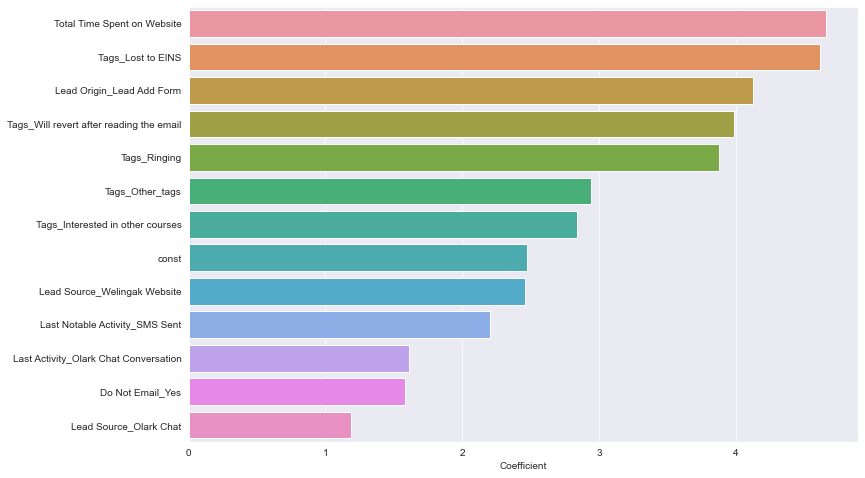

In [107]:
# Barplot for coefficients
plt.figure(figsize= [12,8])
sns.barplot(x = coefficients.Coefficient, y = coefficients.index)
plt.show()

Total time spent on website, Tags_lost to EINS and Lead_Origin Add Form are the top 3 significant variables

In [108]:
# Final columns remaining in X_train
print(cols)
len(cols)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Olark Chat Conversation',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


12

In [109]:
# Predicting with final model logm5
X_train_sm = sm.add_constant(X_train[cols])

y_pred_train = final.predict(X_train_sm)

y_pred_train[:10]

Lead Number
635958    0.000526
627085    0.216825
599386    0.908330
608266    0.014714
581356    0.005340
598323    0.937225
612802    0.052245
595596    0.982845
584774    0.999312
608022    0.998358
dtype: float64

In [110]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_pred_train})
y_train_pred_final.index = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_Prob
Lead Number,,
635958,0,0.000526
627085,0,0.216825
599386,0,0.908330
608266,0,0.014714
581356,0,0.005340
598323,1,0.937225
612802,0,0.052245
595596,1,0.982845
584774,1,0.999312


### Lead Score prediction for train data

In [111]:
y_train_pred_final['Lead_score'] = round(y_train_pred_final['Converted_Prob']* 100)

In [112]:
y_train_pred_final.head(10)

,Converted,Converted_Prob,Lead_score
Lead Number,,,
635958,0,0.000526,0.0
627085,0,0.216825,22.0
599386,0,0.908330,91.0
608266,0,0.014714,1.0
581356,0,0.005340,1.0
598323,1,0.937225,94.0
612802,0,0.052245,5.0
595596,1,0.982845,98.0
584774,1,0.999312,100.0


In [113]:
# Creating new column 'predicted' with 1 if Converted_probability > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Converted,Converted_Prob,Lead_score,Predicted
Lead Number,,,,
635958,0,0.000526,0.0,0
627085,0,0.216825,22.0,0
599386,0,0.908330,91.0,1
608266,0,0.014714,1.0,0
581356,0,0.005340,1.0,0
598323,1,0.937225,94.0,1
612802,0,0.052245,5.0,0
595596,1,0.982845,98.0,1
584774,1,0.999312,100.0,1


In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

In [115]:
# Accuracy of our model with train data

accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.913235700469743

In [116]:
# Let's take a look at the confusion matrix  
confusion1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion1

array([[4237,  240],
       [ 388, 2373]], dtype=int64)

In [117]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

 - Sensitivity of a model is the proportion of yeses (or positives) correctly predicted by it as yeses (or positives)
 
> ___Sensitivity = True Positive / (True Positive + False Negative)___

In [118]:
# Sensitivity of model

sensitivity = TP/float(TP+FN)
sensitivity

0.8594712060847519

- Specificity of a model is proportion of nos (or negatives) correctly predicted by the model as nos (or negatives).

> ___Specificity = True Negative / (True Negatives + False Positive)___

In [119]:
# Let us calculate specificity

specificity = TN / float(TN+FP)

specificity

0.9463926736654009

In [120]:
# Calculate false postive rate 
FPR = print(FP/ float(TN+FP))

0.05360732633459906


In [121]:
# positive predictive value 
PPV = print (TP / float(TP+FP))

0.9081515499425947


In [122]:
# Negative predictive value
NPV = print (TN / float(TN+ FN))

0.916108108108108


# Step 8 : Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [123]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(12, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

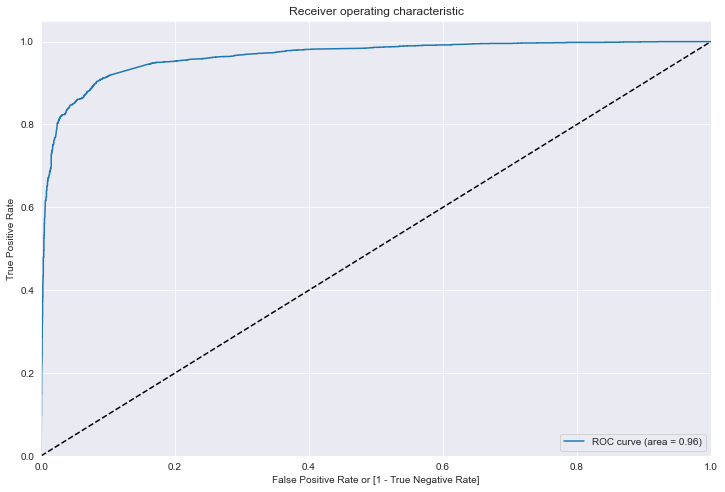

In [125]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Step 9: Finding Optimal Cutoff Point

In [126]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Lead Number,,,,,,,,,,,,,,
635958,0,0.000526,0.0,0,1,0,0,0,0,0,0,0,0,0
627085,0,0.216825,22.0,0,1,1,1,0,0,0,0,0,0,0
599386,0,0.908330,91.0,1,1,1,1,1,1,1,1,1,1,1
608266,0,0.014714,1.0,0,1,0,0,0,0,0,0,0,0,0
581356,0,0.005340,1.0,0,1,0,0,0,0,0,0,0,0,0


In [127]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381459  1.000000  0.000000
0.1   0.1  0.800497  0.968490  0.696895
0.2   0.2  0.877867  0.947483  0.834934
0.3   0.3  0.911301  0.905107  0.915122
0.4   0.4  0.910887  0.884824  0.926960
0.5   0.5  0.913236  0.859471  0.946393
0.6   0.6  0.911440  0.825063  0.964709
0.7   0.7  0.909505  0.801883  0.975877
0.8   0.8  0.892235  0.745382  0.982801
0.9   0.9  0.861702  0.651576  0.991289


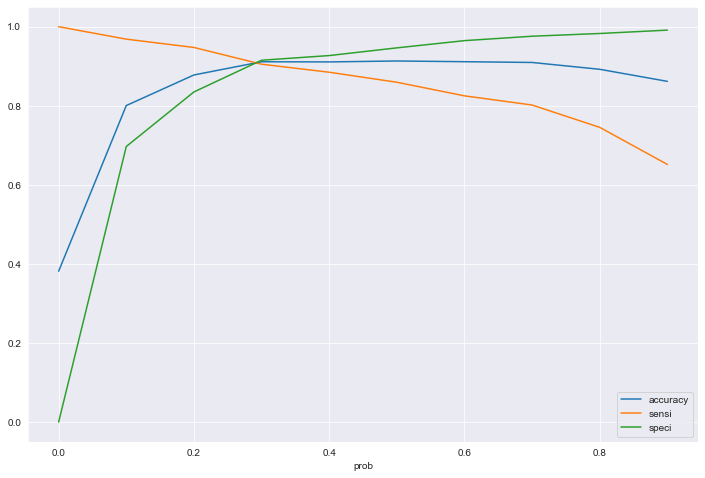

In [128]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot(x = 'prob', y = ['accuracy','sensi', 'speci'], figsize = [12,8])
plt.show()

From the curve above, ___0.3___ is the optimum point to take it as a cutoff probability.

In [129]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
Lead Number,,,,,,,,,,,,,,,
635958,0,0.000526,0.0,0,1,0,0,0,0,0,0,0,0,0,0
627085,0,0.216825,22.0,0,1,1,1,0,0,0,0,0,0,0,0
599386,0,0.908330,91.0,1,1,1,1,1,1,1,1,1,1,1,1
608266,0,0.014714,1.0,0,1,0,0,0,0,0,0,0,0,0,0
581356,0,0.005340,1.0,0,1,0,0,0,0,0,0,0,0,0,0


In [130]:
# Let's check the overall accuracy after 0.3 cutoff
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9113014644929539

In [131]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[4097,  380],
       [ 262, 2499]], dtype=int64)

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9051068453458891

In [134]:
# Let us calculate specificity
TN / float(TN+FP)

0.9151217333035515

In [135]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08487826669644852


In [136]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8680097255991663


In [137]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9398944712089929


### Predictions on test data with 0.3 cutoff

In [213]:
X_test_sm = sm.add_constant(X_test[cols])

y_test_pred = final.predict(X_test_sm)

In [214]:
y_test_pred = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred.index = y_test.index
y_test_pred.head(10)

,Converted,Converted_Prob
Lead Number,,
616820,1,0.992668
609561,0,0.006836
615707,1,0.954104
614849,1,0.998204
608760,0,0.216825
595388,0,0.003083
601447,0,0.816203
633904,1,0.999967
601969,0,0.012851


In [215]:
y_test_pred['Lead_score_test'] = round(y_test_pred['Converted_Prob'] *100)

In [216]:
y_test_pred['final_predicted'] = y_test_pred.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_test_pred.head()

,Converted,Converted_Prob,Lead_score_test,final_predicted
Lead Number,,,,
616820,1,0.992668,99.0,1
609561,0,0.006836,1.0,0
615707,1,0.954104,95.0,1
614849,1,0.998204,100.0,1
608760,0,0.216825,22.0,0


In [217]:
# Let's check the overall accuracy after 0.3 cutoff
metrics.accuracy_score(y_test_pred.Converted, y_test_pred.final_predicted)

0.9110497237569061

In [218]:
confusion2 = metrics.confusion_matrix(y_test_pred.Converted, y_test_pred.final_predicted )
confusion2

array([[1050,   93],
       [  68,  599]], dtype=int64)

In [219]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [220]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8980509745127436

In [221]:
# Let us calculate specificity
TN / float(TN+FP)

0.9186351706036745

# Step 10: Precision and Recall

In [138]:
confusion2

array([[4097,  380],
       [ 262, 2499]], dtype=int64)

##### Precision
TP / TP + FP

In [139]:
# Precision

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8680097255991663

##### Recall
TP / TP + FN

In [140]:
# Recall 

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.9051068453458891

In [141]:
from sklearn.metrics import precision_score, recall_score

In [142]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8680097255991663

In [143]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9051068453458891

## Precision and recall tradeoff

In [144]:
from sklearn.metrics import precision_recall_curve

In [145]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

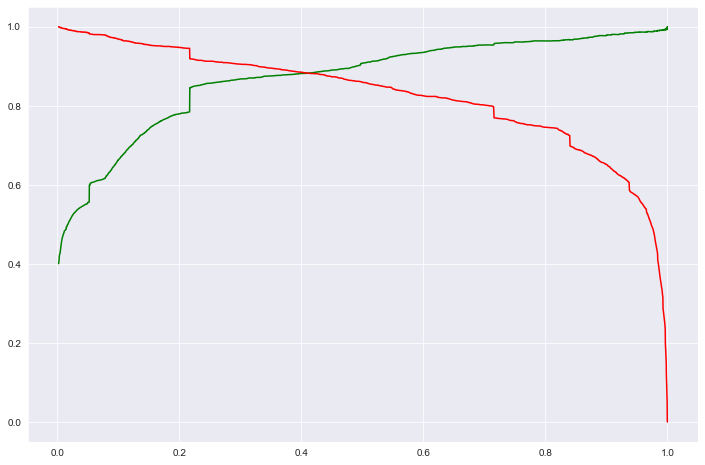

In [146]:
# Precision recall tradeoff 
plt.figure(figsize=[12,8])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 11: Making predictions on the test set

In [147]:
# Taking final columns for test data

X_test = X_test[cols]

In [148]:
# Adding constant

X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [149]:
# Predicting probabilities on test data

y_test_pred = final.predict(X_test_sm)

y_test_pred[:10]

Lead Number
616820    0.992668
609561    0.006836
615707    0.954104
614849    0.998204
608760    0.216825
595388    0.003083
601447    0.816203
633904    0.999967
601969    0.012851
630888    0.002712
dtype: float64

In [150]:
# Test data proabilites and lead score

y_test_pred_final = pd.DataFrame(y_test_pred, columns=['Converted_prob'])

y_test_pred_final ['Lead_score'] = round(y_test_pred_final['Converted_prob']*100)

y_test_pred_final['Converted'] = y_test

In [222]:
# Predictions based on precision and recall tradeoff

y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.41 else 0)

In [223]:
y_test_pred_final.head()

,Converted_prob,Lead_score,Converted,final_predicted
Lead Number,,,,
616820,0.992668,99.0,1,1
609561,0.006836,1.0,0,0
615707,0.954104,95.0,1,1
614849,0.998204,100.0,1,1
608760,0.216825,22.0,0,0


In [224]:
accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.9149171270718232

In [235]:
# Classification report for test data

print(metrics.classification_report(y_test_pred_final.Converted, y_test_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1143
           1       0.88      0.88      0.88       667

    accuracy                           0.91      1810
   macro avg       0.91      0.91      0.91      1810
weighted avg       0.91      0.91      0.91      1810



In [225]:
confusion3 = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted)
confusion3

array([[1066,   77],
       [  77,  590]], dtype=int64)

In [226]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [227]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8845577211394303

In [228]:
# Let us calculate specificity
TN / float(TN+FP)

0.9326334208223972

In [229]:
# Precision

confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.8845577211394303

In [230]:
# Recall 

confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.8845577211394303

In [231]:
y_test_pred_final

,Converted_prob,Lead_score,Converted,final_predicted
Lead Number,,,,
616820,0.992668,99.0,1,1
609561,0.006836,1.0,0,0
615707,0.954104,95.0,1,1
614849,0.998204,100.0,1,1
608760,0.216825,22.0,0,0
...,...,...,...,...
591788,0.076020,8.0,0,0
581016,0.983053,98.0,1,1
640766,0.004157,0.0,0,0


In [232]:
y_train_pred_final

,Converted,Converted_Prob,Lead_score,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
Lead Number,,,,,,,,,,,,,,,
635958,0,0.000526,0.0,0,1,0,0,0,0,0,0,0,0,0,0
627085,0,0.216825,22.0,0,1,1,1,0,0,0,0,0,0,0,0
599386,0,0.908330,91.0,1,1,1,1,1,1,1,1,1,1,1,1
608266,0,0.014714,1.0,0,1,0,0,0,0,0,0,0,0,0,0
581356,0,0.005340,1.0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656526,0,0.052245,5.0,0,1,0,0,0,0,0,0,0,0,0,0
659704,1,0.937225,94.0,1,1,1,1,1,1,1,1,1,1,1,1
587128,0,0.216825,22.0,0,1,1,1,0,0,0,0,0,0,0,0


In [162]:
y_train_pred_final[['Converted_Prob','Lead_score','Converted', 'final_predicted']]

,Converted_Prob,Lead_score,Converted,final_predicted
Lead Number,,,,
635958,0.000526,0.0,0,0
627085,0.216825,22.0,0,0
599386,0.908330,91.0,0,1
608266,0.014714,1.0,0,0
581356,0.005340,1.0,0,0
...,...,...,...,...
656526,0.052245,5.0,0,0
659704,0.937225,94.0,1,1
587128,0.216825,22.0,0,0


In [163]:
# When the cutoff is 0.3 then the hot leads 
y_train_pred_final.final_predicted.sum()

2879

In [164]:
# When the cutoff is 0.3 then the hot leads 
y_test_pred_final.final_predicted.sum()

670

- For train data out of 7238 rows of data, there are 2879 hot leads 

- For test data out of 1810 rows of data, there are 670 hot leads

#### Train data metrics:

__Accuracy:__ 91.1 %

__Sensitivity:__ 90.5 %

__Specificity:__ 91.5 %

__Precision:__ 86.8 %

__Recall:__ 90.5 %

- ----------------------------------------------------------------------------

#### Test data metrics:

__Accuracy:__ 91.5 %

__Sensitivity:__ 88.7 %

__Specificity:__ 93.1 %

__Precision:__ 88.3 %

__Recall:__ 88.7 %



In [165]:
# Conversion rate for train data

y_train_pred_final.final_predicted.sum()/7238

0.3977618126554297

In [166]:
# Conversion rate for test data

y_test_pred_final.final_predicted.sum()/1810

0.3701657458563536

#  Subjective Questions

In [167]:
# When the cutoff is 0.3 then the hot leads 

y_train_pred_final.final_predicted.sum()

2879

If the cutoff is optimal which is 0.3 in this case, then the number of hot leads for the given data is:

- Hot leads are approximately 2879



X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

In [168]:
# Lets decrease the cutoff to increase hot leads
leads = pd.DataFrame(y_pred_train, columns=['Probability'], index=y_train.index)

In [169]:
# Adding lead score column
leads["Lead_score"] = round(leads.Probability *100)

In [170]:
# Now we need to decrease the cutoff to 0.20 probability increase hot leads
leads['predicted'] = leads.Probability.apply(lambda x: 1 if x > 0.20 else 0)

In [171]:
# Adding acutal values to dataframe

leads['Actual'] = y_train

In [172]:
leads.predicted.sum()

3355

In [173]:
leads.head()

,Probability,Lead_score,predicted,Actual
Lead Number,,,,
635958,0.000526,0.0,0,0
627085,0.216825,22.0,1,0
599386,0.908330,91.0,1,0
608266,0.014714,1.0,0,0
581356,0.005340,1.0,0,0


If the cutoff is decreased to 0.20, then the number of leads for the given data is:

- Hot leads increased to 3355 so that the interns can make more calls to increase the leads conversion


In [174]:
# Accuracy for train data

accuracy_score(leads.Actual, leads.predicted)

0.8778668140370268

If we decrease the cutoff to 0.20 probability, then the accuracy is 87.7 %

In [175]:
# Confusion matrix
confusion_matrix(leads.Actual, leads.predicted)

array([[3738,  739],
       [ 145, 2616]], dtype=int64)

In [176]:
# Classification report
print(metrics.classification_report(leads.Actual, leads.predicted))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      4477
           1       0.78      0.95      0.86      2761

    accuracy                           0.88      7238
   macro avg       0.87      0.89      0.87      7238
weighted avg       0.89      0.88      0.88      7238



Precision is 78% and recall is 95 %

In [177]:
# For test data creating dataframe
leads_test = pd.DataFrame(y_test_pred, columns=['Probability'])
leads_test

,Probability
Lead Number,
616820,0.992668
609561,0.006836
615707,0.954104
614849,0.998204
608760,0.216825
...,...
591788,0.076020
581016,0.983053
640766,0.004157


In [178]:
# Adding lead score column

leads_test["Lead_score"] = round(leads_test.Probability *100)

In [179]:
# Now we need to decrease the cutoff to 0.20 probability increase hot leads
leads_test['predicted'] = leads_test.Probability.apply(lambda x: 1 if x > 0.20 else 0)

In [180]:
leads_test['Actual'] = y_test

In [181]:
# Total hot leads 

leads_test.predicted.sum()

826

In [182]:
# Accuracy for test data

accuracy_score(leads_test.Actual, leads_test.predicted)

0.8657458563535911

In [183]:
# Confusion matrix
confusion_matrix(leads_test.Actual, leads_test.predicted)

array([[942, 201],
       [ 42, 625]], dtype=int64)

In [184]:
# Classification report
print(metrics.classification_report(leads_test.Actual, leads_test.predicted))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      1143
           1       0.76      0.94      0.84       667

    accuracy                           0.87      1810
   macro avg       0.86      0.88      0.86      1810
weighted avg       0.88      0.87      0.87      1810



For test data precision is around 76% and recall is 94%

Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In [185]:
# At this point, we need to increase the cutoff as they can only call when it's extremely necessary

High_leads = pd.DataFrame(y_pred_train, columns=['Probability'])


In [186]:
# Now we need to increase the cutoff to 0.80 probability to decrease count of  hot leads

High_leads['predicted'] = High_leads.Probability.apply(lambda x: 1 if x > 0.80 else 0)

In [187]:
# Adding actual values to data frame
High_leads['Actual'] = y_train.values

In [188]:
# Total hot leads in train data
High_leads.predicted.sum()

2135

We can see that there are 2135 hot leads out of 7238 values where the probability is more than 0.8. We can call these leads whenever it is extremely necessary to explain Education courses to increase the conversion rate.

In [189]:
High_leads

,Probability,predicted,Actual
Lead Number,,,
635958,0.000526,0,0
627085,0.216825,0,0
599386,0.908330,1,0
608266,0.014714,0,0
581356,0.005340,0,0
...,...,...,...
656526,0.052245,0,0
659704,0.937225,1,1
587128,0.216825,0,0


In [190]:
# Accuracy for train data

accuracy_score(High_leads.Actual, High_leads.predicted)

0.8922354241503178

Accuracy is 89.2 %

In [191]:
# Confusion matrix

confusion_matrix(High_leads.Actual, High_leads.predicted)

array([[4400,   77],
       [ 703, 2058]], dtype=int64)

In [192]:
# Classification report

print(metrics.classification_report(High_leads.Actual, High_leads.predicted))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      4477
           1       0.96      0.75      0.84      2761

    accuracy                           0.89      7238
   macro avg       0.91      0.86      0.88      7238
weighted avg       0.90      0.89      0.89      7238



For train data:

- Precision: 76 %
- recall: 75%
- Accuracy : 89 %

In [193]:
# For test data
Hightest_leads = pd.DataFrame(y_test_pred, columns=['Probability'])

In [194]:
# Now we need to increase the cutoff to 0.80 probability to decrease count of  hot leads

Hightest_leads['predicted'] = Hightest_leads.Probability.apply(lambda x: 1 if x > 0.80 else 0)

In [195]:
# Adding actual values to the Dataframe

Hightest_leads['Actual'] = y_test.values

In [196]:
Hightest_leads

,Probability,predicted,Actual
Lead Number,,,
616820,0.992668,1,1
609561,0.006836,0,0
615707,0.954104,1,1
614849,0.998204,1,1
608760,0.216825,0,0
...,...,...,...
591788,0.076020,0,0
581016,0.983053,1,1
640766,0.004157,0,0


In [197]:
# Total hot leads
Hightest_leads.predicted.sum()

534

In [198]:
# Accuracy for test data

accuracy_score(Hightest_leads.Actual, Hightest_leads.predicted)

0.8966850828729281

In [199]:
# Confusion matrix

confusion_matrix(Hightest_leads.Actual, Hightest_leads.predicted)

array([[1116,   27],
       [ 160,  507]], dtype=int64)

In [200]:
# Classification report

print(metrics.classification_report(Hightest_leads.Actual, Hightest_leads.predicted))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1143
           1       0.95      0.76      0.84       667

    accuracy                           0.90      1810
   macro avg       0.91      0.87      0.88      1810
weighted avg       0.90      0.90      0.89      1810



For test data

- Precision : 95 %
- Recall : 76 %
- Accuracy : 90 %